In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df=pd.read_csv('train.csv')

In [3]:
test_df=pd.read_csv('test.csv')

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
train_df.shape

(891, 12)

In [7]:
cols=list(train_df.columns)

In [8]:
cols

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [9]:
train_df['Pclass'].dtypes

dtype('int64')

In [11]:
cat_var

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [13]:
num_col

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [14]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

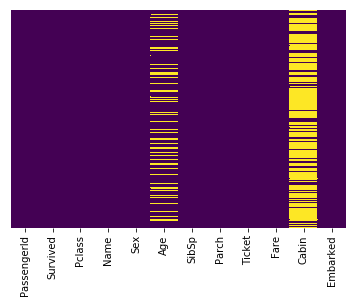

In [16]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
train_df[num_col].nunique()

PassengerId    891
Survived         2
Pclass           3
Age             88
SibSp            7
Parch            7
Fare           248
dtype: int64

In [18]:
train_df[cat_var].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

#Missin Value

In [19]:
test_df[test_df['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


Only 1 NAn value with PClass 3 and Sex male and Embarked S

In [20]:
test_df['Fare'].fillna(test_df[(test_df['Pclass']==3)&(test_df['Sex']=='male')&(test_df['Embarked']=='S')]['Fare'].median(),inplace=True)

In [21]:
test_df.loc[152,:]

PassengerId                  1044
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                       7.9875
Cabin                         NaN
Embarked                        S
Name: 152, dtype: object

In [22]:
test_df['Cabin']=test_df[test_df['Cabin'].notnull()]['Cabin'].apply(lambda x: x[0])
test_df['Cabin'].unique()

array([nan, 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

In [23]:
a=lambda x: x[0]

train_df['Cabin']=train_df[train_df['Cabin'].notnull()]['Cabin'].apply(lambda x: x[0])

In [24]:
train_df['Cabin'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

All unique values of test_df is there in train_df

In [25]:
train_df['Cabin'].fillna('Z',inplace=True)

In [26]:
train_df['Cabin'].unique()

array(['Z', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [27]:
test_df['Cabin'].fillna('Z',inplace=True)

In [28]:
train_df['Cabin'].value_counts()

Z    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [29]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64

In [30]:
test_df.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        0
dtype: int64

In [31]:
train_df[train_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B,NaN


In [32]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

PassengerId 62 and 830 have missing embarked values

Both have Passenger class 1 and fare $80.

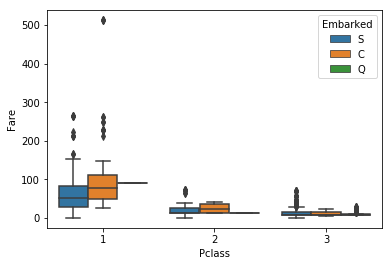

In [33]:
sns.boxplot(x='Pclass',y='Fare',hue='Embarked',data=train_df)

PClass 1 with median Fare 80 is having Embarked C

In [34]:
train_df['Embarked'].fillna('C',inplace=True)

In [35]:
train_df['Embarked'].value_counts()

S    644
C    170
Q     77
Name: Embarked, dtype: int64

In [36]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

Instead of individual Siblings and parents, Make a combined column with name Family Size

In [37]:
train_df['FamilySize']=train_df['SibSp']+ train_df['Parch']+1
test_df['FamilySize']=test_df['SibSp']+ test_df['Parch']+1

In [38]:
train_df['FamilySize'].head()

0    2
1    2
2    1
3    2
4    1
Name: FamilySize, dtype: int64

Creating new Column named Family class(vsmall,small,medium,large) out of Family Size

In [39]:
train_df.FamilySize.value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

In [40]:
def FamilyC(col):
    if col>=0 and col < 2:
        return 'vsmall'
    elif col>=2 and col <5:
        return 'small'
    elif col>=5 and col <7:
        return 'medium'
    else:
        return 'large'
train_df['FamilyClass']=train_df['FamilySize'].apply(FamilyC)
test_df['FamilyClass']=test_df['FamilySize'].apply(FamilyC)

In [41]:
train_df.FamilyClass.value_counts()

vsmall    537
small     292
medium     37
large      25
Name: FamilyClass, dtype: int64

In [42]:
test_df.FamilyClass.value_counts()

vsmall    253
small     145
medium     10
large      10
Name: FamilyClass, dtype: int64

In [43]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize',
       'FamilyClass'],
      dtype='object')

In [44]:
train_df['Name'].nunique()

891

Grabbing Important/rare titles from Names

In [45]:
import re

In [46]:
am=re.search('[a-zA-Z]+\.',train_df.loc[2]['Name'])

In [47]:
am.group(0)

'Miss.'

In [48]:
def grab_title(name):
    myTitle=0
    myTitle=re.search('[a-zA-Z]+\.',name)
    
    if(myTitle):
        return myTitle.group(0)
    else:
        return ""
title=train_df['Name'].apply(grab_title)
title_test=test_df['Name'].apply(grab_title)

In [49]:
title.value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
Jonkheer.      1
Mme.           1
Ms.            1
Countess.      1
Lady.          1
Capt.          1
Don.           1
Sir.           1
Name: Name, dtype: int64

In [50]:
title_test.count()

418

In [51]:
my_dict={'Mlle.':'Miss.','Ms.':'Miss.','Mme.':'Mrs.','Mr.':'Mr.','Miss.':'Miss.','Mrs.':'Mrs.','Master.':'Master.',
        'Dona.':'Rare', 'Lady.':'Rare', 'Countess.':'Rare','Capt.':'Rare', 'Col.':'Rare',
         'Don.':'Rare', 'Dr.':'Rare', 'Major.':'Rare', 'Rev.':'Rare', 'Sir.':'Rare', 'Jonkheer.':'Rare'}

In [52]:
rare_title=['Dona', 'Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']
ti=title.map(my_dict)
ti_test=title_test.map(my_dict)
#df_cat['mpg_level'] = df['mpg'].apply(lambda x: 'low' if x<17 else 'high' if x>29 else 'medium')


In [53]:
ti_test.count()

418

In [54]:
train_df['Name_title']=ti
test_df['Name_title']=ti_test

In [68]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null int64
Embarked       891 non-null int64
FamilySize     891 non-null int64
FamilyClass    891 non-null int64
Name_title     891 non-null int64
dtypes: float64(2), int64(11), object(2)
memory usage: 104.5+ KB


In [56]:
train_df['Ticket'].nunique()

681

In [57]:
nonrequire_cols=['PassengerId','Name','SibSp','Parch','Ticket','FamilySize']

In [71]:
train_df.drop(nonrequire_cols,axis=1,inplace=True)

In [72]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            714 non-null float64
Fare           891 non-null float64
Cabin          891 non-null int64
Embarked       891 non-null int64
FamilyClass    891 non-null int64
Name_title     891 non-null int64
dtypes: float64(2), int64(7)
memory usage: 62.7 KB


In [60]:
test_df.FamilyClass.value_counts()

vsmall    253
small     145
medium     10
large      10
Name: FamilyClass, dtype: int64

In [61]:
train_df.FamilyClass.value_counts()

vsmall    537
small     292
medium     37
large      25
Name: FamilyClass, dtype: int64

In [62]:
#sex=pd.get_dummies(data=train_df,columns=['Sex','Cabin','Embarked','FamilyClass','Name_title'],drop_first=True)
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

labelEnc=LabelEncoder()

cat_vars=['Sex','Cabin','Embarked','FamilyClass','Name_title']
for col in cat_vars:
    train_df[col]=labelEnc.fit_transform(train_df[col])
    test_df[col]=labelEnc.fit_transform(test_df[col])


In [73]:
#sex.head()
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilyClass,Name_title
0,0,3,1,22.0,7.2500,8,2,2,2
1,1,1,0,38.0,71.2833,2,0,2,3
2,1,3,0,26.0,7.9250,8,2,3,1
3,1,1,0,35.0,53.1000,2,2,2,3
4,0,3,1,35.0,8.0500,8,2,3,2


Using Random Forst to predict missing ages

In [64]:
from sklearn.ensemble import RandomForestRegressor

In [74]:
def fill_missing_age(df):
    X_train_age=df[df['Age'].notnull()]
    Y_train_age=X_train_age['Age']
    X_train_age.drop('Age',axis=1,inplace=True)
    
    X_test_age=df[df['Age'].isnull()]
    X_test_age.drop('Age',axis=1,inplace=True)
    #print(X_test_age.count())
    
    
    regr_mod=RandomForestRegressor(n_estimators=100, n_jobs=-1)
    regr_mod.fit(X_train_age,Y_train_age)
    pred_age=regr_mod.predict(X_test_age)
    #print(len(pred_age))
    #df[df['Age'].isnull()]['Age']=pd.Series(pred_age)
    df.loc[ (df.Age.isnull()), 'Age' ]=pred_age
    #X_test_age['Age']=pred_age
    #print(df[df['Age'].isnull()]['Age'].head())
    #print(df.head(10))
    #print(X_test_age.head(10))
    return df
    
    

In [ ]:
test_df.shape

In [ ]:
test_df[test_df['Age'].isnull()].head()

In [75]:
test_df=fill_missing_age(test_df)
train_df=fill_missing_age(train_df)

C:\Users\kunal\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Users\kunal\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [76]:
train_df['Age'].isnull().sum()

0

In [78]:
test_df.shape

(418, 8)

In [80]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
Fare           891 non-null float64
Cabin          891 non-null int64
Embarked       891 non-null int64
FamilyClass    891 non-null int64
Name_title     891 non-null int64
dtypes: float64(2), int64(7)
memory usage: 62.7 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BA15DA9470>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001BA16E2BD68>]], dtype=object)

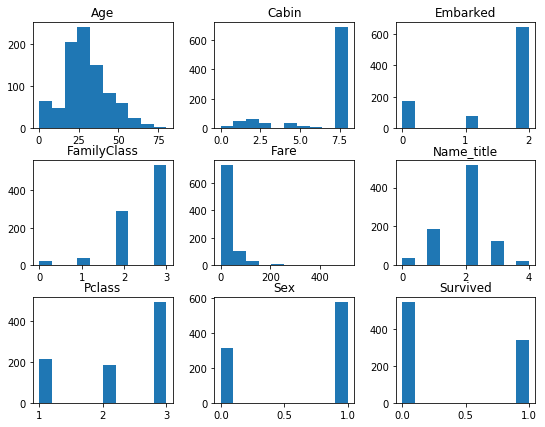

In [79]:
train_df.hist(bins=10,figsize=(9,7),grid=False)

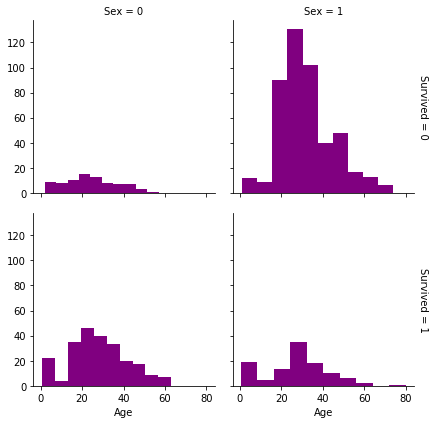

In [82]:
g = sns.FacetGrid(train_df, col="Sex", row="Survived", margin_titles=True)
g.map(plt.hist, "Age",color="purple")

In [85]:
cols=list(train_df.columns)
cat_var=list(col for col in cols if train_df[col].dtypes=='object')
num_col=list(col for col in cols if col not in cat_var)

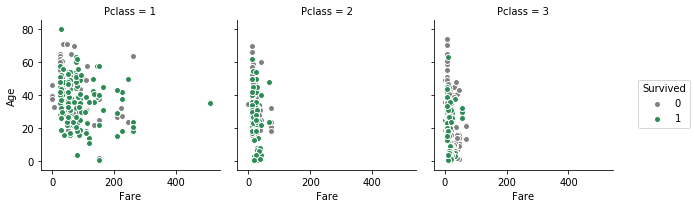

In [89]:
g = sns.FacetGrid(train_df, hue="Survived", col="Pclass", margin_titles=True,
                  palette={1:"seagreen", 0:"gray"})
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend();

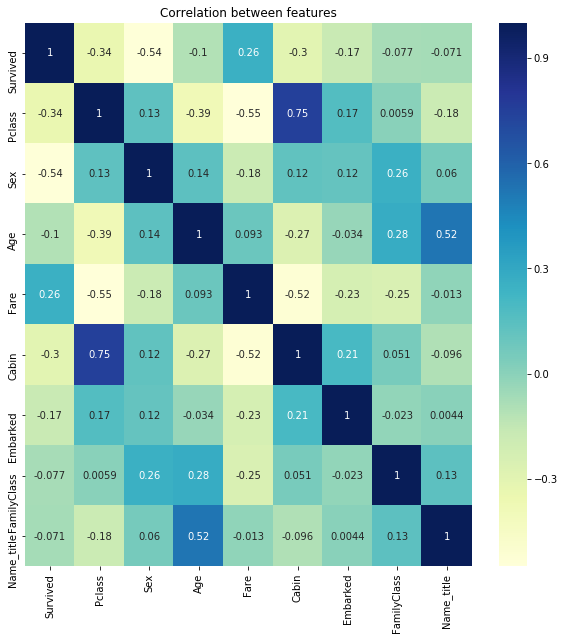

In [95]:
plt.figure(figsize=(10, 10))
corr=train_df.corr()
sns.heatmap(corr,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

Age, Fare are measured on different scales, so we need to do Feature Scaling first before we proceed with predictions

In [96]:
from sklearn.preprocessing import StandardScaler

In [99]:
std_scale=StandardScaler()
std_scale.fit(train_df[['Age','Fare']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [100]:
std_scale.transform(train_df[['Age','Fare']])

array([[-0.55752713, -0.50244517],
       [ 0.59498654,  0.78684529],
       [-0.26939871, -0.48885426],
       ..., 
       [-1.47653673, -0.17626324],
       [-0.26939871, -0.04438104],
       [ 0.16279391, -0.49237783]])

In [101]:
std_scale.transform(test_df[['Age','Fare']])

array([[  3.42874176e-01,  -4.90783161e-01],
       [  1.24327548e+00,  -5.07478843e-01],
       [  2.32375705e+00,  -4.53366871e-01],
       [ -1.97366608e-01,  -4.74004926e-01],
       [ -5.57527131e-01,  -4.01016685e-01],
       [ -1.13378397e+00,  -4.62679164e-01],
       [  1.87297059e-02,  -4.94810098e-01],
       [ -2.69398712e-01,  -6.45157251e-02],
       [ -8.45655549e-01,  -5.02863973e-01],
       [ -6.29559235e-01,  -1.62168958e-01],
       [ -9.22732085e-02,  -4.89442190e-01],
       [  1.17124338e+00,  -1.24919787e-01],
       [ -4.85495026e-01,   1.00799262e+00],
       [  2.39578916e+00,  -1.24919787e-01],
       [  1.24327548e+00,   5.83317835e-01],
       [ -4.13462922e-01,  -9.02720170e-02],
       [  3.78890229e-01,  -3.99758267e-01],
       [ -6.29559235e-01,  -5.02948539e-01],
       [ -1.97366608e-01,  -4.88854258e-01],
       [  1.09921127e+00,  -5.02948539e-01],
       [  1.81953232e+00,   5.47578765e-01],
       [ -1.49394449e+00,  -5.84578587e-01],
       [  

In [102]:
train_df.corr()['Survived']

Survived       1.000000
Pclass        -0.338481
Sex           -0.543351
Age           -0.101695
Fare           0.257307
Cabin         -0.301116
Embarked      -0.174199
FamilyClass   -0.077333
Name_title    -0.071174
Name: Survived, dtype: float64

Linera Regression

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import KFold

In [109]:
predictor_cols=(list(train_df.columns))

In [111]:
predictor_cols.remove('Survived')

In [113]:
target_col='Survived'

In [116]:
alg=LinearRegression(n_jobs=-1)
kfold=KFold(train_df.shape[0],n_folds=3,random_state=3)

In [115]:
predictions=[]

In [119]:
for train,test in kfold:
    train_predictors=train_df[predictor_cols].iloc[train,:]
    train_target=train_df[target_col].iloc[train]
    alg.fit(train_predictors,train_target)
    test_predictions=alg.predict(train_df[predictor_cols].iloc[test,:])
    predictions.append(test_predictions)

In [126]:
predictions.shape

(891,)

In [127]:
predictions[predictions > .5] = 1
predictions[predictions <=.5] = 0

In [130]:
from sklearn.metrics import accuracy_score

In [131]:
accuracy_score(train_df['Survived'],predictions)

0.79685746352413023

Logistic Regression

In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import ShuffleSplit,cross_val_score

In [136]:
lr=LogisticRegression(random_state=1)
# Compute the accuracy score for all the cross validation folds.
cv = ShuffleSplit(train_df.shape[0],n_iter=10, test_size=0.3, random_state=50)
pred_score=cross_val_score(lr,train_df[predictor_cols],train_df[target_col],scoring='f1',cv=cv)

In [138]:
pred_score.mean()

0.73648562547145158

Random Forest

In [139]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_predict

In [140]:
rf=RandomForestClassifier(n_estimators=50,criterion='gini', max_depth=9,min_samples_split=6, min_samples_leaf=4,random_state=1)
rf.fit(train_df[predictor_cols],train_df[target_col])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=6,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [141]:
cv=KFold(train_df.shape[0],n_folds=3,random_state=1)
predictions=cross_val_predict(rf,train_df[predictor_cols],train_df[target_col],cv=cv,n_jobs=-1)
scores=cross_val_score(rf,train_df[predictor_cols],train_df[target_col],cv=cv,n_jobs=-1,scoring='f1')
accuracy=np.mean(scores)
print(accuracy)

0.771524787217


In [142]:
important_f=rf.feature_importances_
important_f

array([ 0.09488082,  0.30724419,  0.13153806,  0.16401661,  0.06988724,
        0.02371297,  0.07101263,  0.13770749])

In [143]:
predictor_cols

['Pclass',
 'Sex',
 'Age',
 'Fare',
 'Cabin',
 'Embarked',
 'FamilyClass',
 'Name_title']

In [152]:
#Return the indices of sorted values
indices = np.argsort(important_f)[::-1]

In [153]:
indices

array([1, 3, 7, 2, 0, 6, 4, 5], dtype=int64)

In [159]:
sorted_import_val=sorted(important_f,reverse=True)

In [160]:
sorted_import_val

[0.30724419095615668,
 0.16401660743824262,
 0.13770749145617772,
 0.13153806112478023,
 0.094880819062035965,
 0.071012629054969731,
 0.069887235513293233,
 0.023712965394343876]

In [149]:
std = np.std([rf.feature_importances_ for tree in rf.estimators_],
             axis=0)

In [155]:
sorted_important_features=[]
for i in indices:
    sorted_important_features.append(predictor_cols[i])

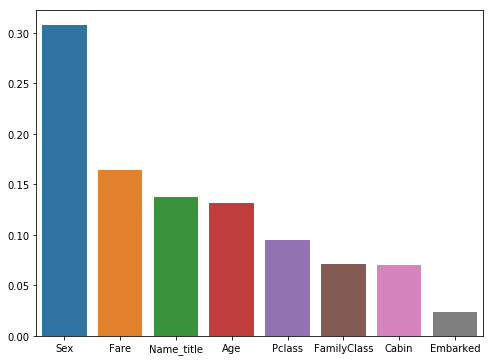

In [164]:
plt.figure(figsize=(8,6))
sns.barplot(x=sorted_important_features,y=sorted_import_val)

In [170]:
women = train_df.loc[train_df.Sex == 0]["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [171]:
test_df.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilyClass,Name_title
0,3,1,34.5,7.8292,7,1,3,2
1,3,0,47.0,7.0000,7,2,2,3
2,2,1,62.0,9.6875,7,1,3,2
3,3,1,27.0,8.6625,7,2,3,2
4,3,0,22.0,12.2875,7,2,2,3


In [172]:
test_df.loc[152]

Pclass          3.0000
Sex             1.0000
Age            60.5000
Fare            7.9875
Cabin           7.0000
Embarked        2.0000
FamilyClass     3.0000
Name_title      2.0000
Name: 152, dtype: float64

In [197]:
pred_linReg=alg.predict(test_df)

In [198]:
result_df=pd.read_csv('gender_submission.csv')

In [199]:
result_df.Survived.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [200]:
pred_linReg=pd.Series(pred_linReg)

In [201]:
pred_linReg.head()

0    0.111110
1    0.461983
2    0.099782
3    0.135498
4    0.613360
dtype: float64

In [202]:
pred_linReg[pred_linReg > .5] = 1
pred_linReg[pred_linReg <=.5] = 0

In [187]:
result_df=pd.DataFrame(np.column_stack((result_df.PassengerId,pred_linReg)),columns=["PassengerId","Survived"])
#result_df=pd.DataFrame({'PassengerId': result_df.PassengerId, 'Survived': pred_linReg})

In [188]:
result_df.head()

,PassengerId,Survived
0,892.0,0.0
1,893.0,0.0
2,894.0,0.0
3,895.0,0.0
4,896.0,1.0


In [191]:
result_df['PassengerId']=np.int32(result_df['PassengerId'])
result_df['Survived']=np.int32(result_df['Survived'])

In [193]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int32
Survived       418 non-null int32
dtypes: int32(2)
memory usage: 3.3 KB


In [194]:
result_df.to_csv('my_submission.csv', index=False)